<a href="https://colab.research.google.com/github/josselynmata/cs666student/blob/main/Assignment1_Josselyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

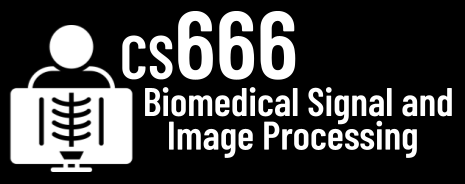

# Assignment 1

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [ ]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 3.4 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [ ]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [ ]:
metadata

{'sampling_rate': 1000.0, 'resolution': 12, 'labels': ['ECG']}

In [ ]:
len(signal)

15000

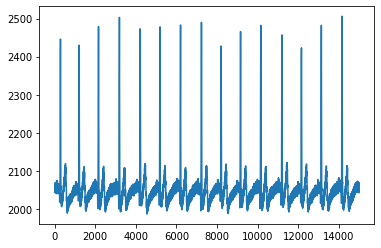

In [ ]:
plt.plot(signal)

In [ ]:
SAMPLING_RATE = 1000 #Based on metadata- 1000 samples per second (Hz)
SECONDS = 15 #15,000/1000= 15 seconds

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

In [ ]:
from biosppy.signals import ecg
ProcessedECG= ecg.ecg(signal=signal, sampling_rate= SAMPLING_RATE, show=False)

In [ ]:
rpeaks=ProcessedECG[2]

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

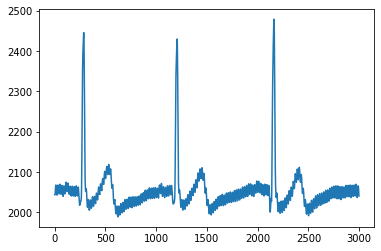

In [ ]:
### TODO plot unfiltered signal
plt.plot(signal[0:3000]) # P, Q, S  waves are not super clear

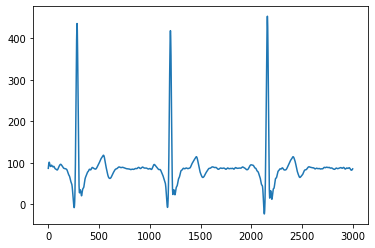

In [ ]:
### TODO plot filtered signal
plt.plot(ProcessedECG[1][0:3000]) #P, Q, R, S, T waves are very clear

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

In [ ]:
rpeaksTime= rpeaks/1000
rpeaksTime

array([ 0.283,  1.204,  2.159,  3.188,  4.211,  5.188,  6.2  ,  7.232,
        8.2  ,  9.157, 10.156, 11.198, 12.159, 13.139, 14.162])

Text(0.5, 0, 'Time[s]')

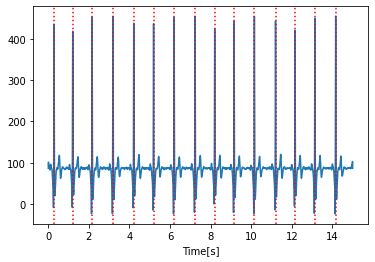

In [ ]:
### TODO
plt.plot(ProcessedECG[0], ProcessedECG[1])
[plt.axvline(_x, color = 'r', ls=':') for _x in rpeaksTime]
plt.xlabel('Time[s]')

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [ ]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.2 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

In [ ]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


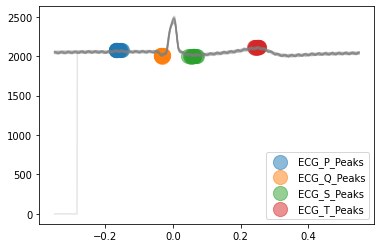

In [ ]:
# Delineate the ECG signal and visualizing all peaks of ECG complexes
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=1000, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Does the detection work well?
# In terms of detecting where the peaks would be, I think the detection worked well. Now, I'm not sure if this is exactly how the plot is supposed to look
# like. It gave me the warning and I looked into it but could not fix it. As it is a warning and not an error, I just kept it that way. Let me know if I
# did anything wrong. 

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

In [ ]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

In [ ]:
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, rpeaks, sampling_rate=1000, method="peak")

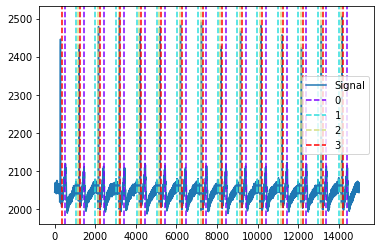

In [ ]:

plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

# purple= T peak, light blue= P peak, green/yellow= Q peak, red= S peak

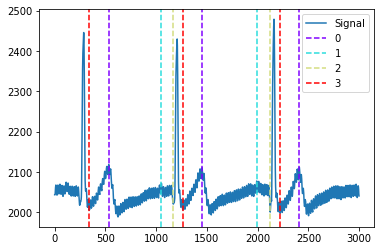

In [ ]:
# To visualize it better, I'll look at the first 3 seconds.
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][0:3], 
                       waves_peak['ECG_P_Peaks'][0:3],
                       waves_peak['ECG_Q_Peaks'][0:3],
                       waves_peak['ECG_S_Peaks'][0:3]], signal[0:3000])

# purple= T peak, light blue= P peak, green/yellow= Q peak, red= S peak

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

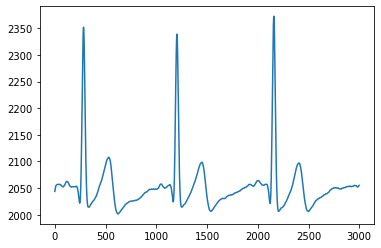

In [ ]:
Filter_Signal= nk.signal_filter(signal, sampling_rate=1000, lowcut=0, highcut=20)
plt.plot(Filter_Signal[0:3000])
# Noise is usually high frequency ~50-60Hz. So I initially started cutting those frequencies. After playing around with it for a bit, I believe that 
# the best high cut is 20 Hz. I kept the low cut as 0Hz because lower frequencies are important to keep.

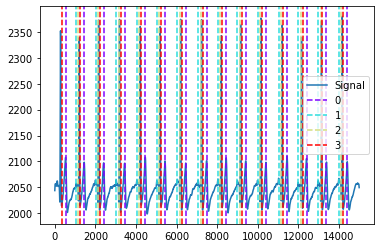

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, filt_waves_peak = nk.ecg_delineate(Filter_Signal, rpeaks, sampling_rate=1000, method="peak")
plot = nk.events_plot([filt_waves_peak['ECG_T_Peaks'], 
                       filt_waves_peak['ECG_P_Peaks'],
                       filt_waves_peak['ECG_Q_Peaks'],
                       filt_waves_peak['ECG_S_Peaks']], Filter_Signal)

# purple= T peak, light blue= P peak, green/yellow= Q peak, red= S peak


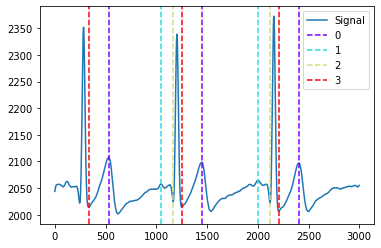

In [ ]:
# To visualize it better, I'll look at the first 3 seconds.
plot = nk.events_plot([filt_waves_peak['ECG_T_Peaks'][0:3], 
                       filt_waves_peak['ECG_P_Peaks'][0:3],
                       filt_waves_peak['ECG_Q_Peaks'][0:3],
                       filt_waves_peak['ECG_S_Peaks'][0:3]], Filter_Signal[0:3000])

# purple= T peak, light blue= P peak, green/yellow= Q peak, red= S peak

In [ ]:
# TODO Which one works the best?
# The filtered signal definitely looks the best, most accurate, and the most clear.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#